##  Parallaxes

In [1]:
%run Data_file
from scipy.interpolate import interp1d
import numpy as np

#import values for all sources into a table
value_single_source = []
trial = []
f = open('GAIA3 archive.json', 'r')
lines = f.readlines()[20:-2]
initial_value = 0
for z in range(len(lines)):
    trial = lines[z][1:]
    x = 0
    for x in range(len(trial)):
        #cut the elements when a ',' is met
        if trial[x] == ',':
            value_single_source.append(trial[initial_value:x])
            initial_value = x+1
f.close()
value_single_source_updated = []

#eliminate bracket from values
for x in value_single_source:
    for z in range(len(x)):
        if x[z] == ']':
            x = x[:z]
    value_single_source_updated.append(x)


#eliminate empty values in list
#value_single_source_updated = [i for i in value_single_source_updated if i]

#extract parallax values from table
sources_106 = []
parallax_106 = []
parallax_error_106 = []
for i in range(106):
    parallax_106.append(value_single_source_updated[15 * i + 4])
    parallax_error_106.append(value_single_source_updated[15 * i + 5])
    sources_106.append(value_single_source_updated[15 * i + 6][1:-1])

#change 'null' to 1000/145 so that the final distance is 145pc
parallax_106 = ['6.896551724' if item == 'null' else item for item in parallax_106]
parallax_error_106 = ['0.83594566' if item == 'null' else item for item in parallax_error_106]

#change elements to floats
parallax_106 = [float(x) for x in parallax_106]
parallax_error_106 = [float(x) for x in parallax_error_106]

#turn parallaxes into distances [pc]
distances_106 = []
distances_upper_error_106 = []
distances_lower_error_106 = []
for x in range(len(parallax_106)):
    distances_106.append(1/parallax_106[x] * 1000)
    distances_upper_error_106.append((1 / (parallax_106[x] - parallax_error_106[x])) * 1000 - distances_106[x])
    distances_lower_error_106.append((1 / (parallax_106[x] + parallax_error_106[x])) * 1000 - distances_106[x])

#update luminosity and the error
luminosity_106 = []
luminosity_error_106 = []
for x in range(len(distances_106)):
    luminosity_106.append(np.log10((10 ** luminosity_list_barenfeld[x]) * (distances_106[x]**2) / (145**2)))

#interpolate function from points in feiden
f = interp1d(temperature_feiden, mass_feiden)

#calculate masses
masses_106 = []
temperature_list_barenfeld_error_values = []
for index, element in enumerate(temperature_list_barenfeld):
    temperature_list_barenfeld_error_values.append(10**(element + temperature_list_barenfeld_error[index])-10**(element))

temperature_list_barenfeld = [10**x for x in temperature_list_barenfeld]
for x in temperature_list_barenfeld:
    masses_106.append(float(f(x)))

distances_updated_upper_sco = []
for index_source_garrett, element_source_garrett in enumerate(source_list_garrett):
    for index_source_barenfeld, element_source_barenfeld in enumerate(source_list_barenfeld_2016):
        if element_source_garrett == element_source_barenfeld:
            distances_updated_upper_sco.append(distances_106[index_source_barenfeld])


def update_luminosity(old_luminosity_list, new_distance):
    return (10**old_luminosity_list) * (new_distance**2) / (145**2)

#create function for creating error in luminosity
def update_luminosity_error(distance_new, new_distance_error, old_luminosity, old_luminosity_error):
    return np.sqrt(((distance_new/145)**2 * old_luminosity_error)**2 + (old_luminosity/(145**2) * (2*distance_new) * new_distance_error)**2)

luminosity_upper_error_106 = []
luminosity_lower_error_106 = []
luminosity_106 = [10**x for x in luminosity_106]

for x in range(106):
    luminosity_lower_error_106.append(update_luminosity_error(distances_106[x], distances_lower_error_106[x],
                                                              luminosity_list_barenfeld[x], luminosity_list_barenfeld_error[x]))
    luminosity_upper_error_106.append(update_luminosity_error(distances_106[x], distances_upper_error_106[x],
                                                              luminosity_list_barenfeld[x], luminosity_list_barenfeld_error[x]))


luminosity_upper_error_106_1 = []
luminosity_lower_error_106_1 = []
for i in range(106):
    luminosity_upper_error_106_1.append(luminosity_upper_error_106[i] + luminosity_106[i])
    luminosity_lower_error_106_1.append(luminosity_lower_error_106[i] + luminosity_106[i])

luminosity_lower_error_106 = [np.log10(x) for x in luminosity_lower_error_106]
luminosity_upper_error_106 = [np.log10(x) for x in luminosity_upper_error_106]

luminosity_106 = [np.log10(x) for x in luminosity_106]

luminosity_upper_error_106_2 = []
luminosity_lower_error_106_2 = []
for i in range(106):
    luminosity_upper_error_106_2.append(luminosity_upper_error_106[i] + luminosity_106[i])
    luminosity_lower_error_106_2.append(luminosity_lower_error_106[i] + luminosity_106[i])

done


In [2]:

#for i in range(106):
#    luminosity_upper_error_106 = [x + luminosity_106[i] for x in luminosity_upper_error_106]
#    luminosity_lower_error_106 = [x + luminosity_106[i] for x in luminosity_lower_error_106]

#luminosity_106 = [10**x for x in luminosity_106]
#calculate the errors for the luminosities
#average_new_luminosity_106 = []
#upper_error_new_luminosities_106 = []
#lower_error_new_luminosities_106 = []
#for index_distance_106, element_distance_106 in enumerate(distances_106):
#    distance_range_list = []
#    luminosity_range_list = []
#    x_values = []
#    new_luminosities_list = []
#    distance_range_list = np.arange(element_distance_106 - distances_error_106[index_distance_106], element_distance_106
#                                    + distances_error_106[index_distance_106], distances_error_106[index_distance_106] / 100)
#    luminosity_range_list = np.arange(luminosity_list_barenfeld[index_distance_106] - luminosity_list_barenfeld_error[index_distance_106],
#                                      luminosity_list_barenfeld[index_distance_106] + luminosity_list_barenfeld_error[index_distance_106],
#                                      luminosity_list_barenfeld_error[index_distance_106] / 100)
#    for x in range(99):
#        for z in range(99):
#            new_luminosities_list.append(update_luminosity(luminosity_range_list[z], distance_range_list[x]))
#        x_values.append(distance_range_list[x])
#
#
#    average_new_luminosity_106.append(np.log10(mean(new_luminosities_list)))
#
#    upper_error_new_luminosities_106.append(np.log10(luminosity_106[index_distance_106]) -np.log10(max(new_luminosities_list)))
#    lower_error_new_luminosities_106.append(np.log10(min(new_luminosities_list)) - np.log10(luminosity_106[index_distance_106]))


#plt.hist(np.log10(new_luminosities_list), 500)
#plt.show()
#luminosity_106 = [np.log10(x) for x in luminosity_106]

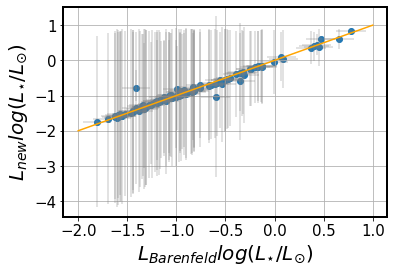

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

#avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

#manipulate trasnparency errobars
kwargs_errobar = {'alpha': 0.3}

#create initial and final point for the line
x = [-2, 1]
y = [-2, 1]

luminosity_lower_error_106_2 = [np.abs(x) for x in luminosity_lower_error_106_2]
luminosity_upper_error_106_2 = [np.abs(x) for x in luminosity_upper_error_106_2]
plt.scatter(luminosity_list_barenfeld, luminosity_106)
plt.errorbar(luminosity_list_barenfeld, luminosity_106, xerr=luminosity_list_barenfeld_error, ls='none', c='gray', **kwargs_errobar)
plt.errorbar(luminosity_list_barenfeld, luminosity_106, yerr=(luminosity_upper_error_106_2, luminosity_lower_error_106_2) , ls='none', c='gray', **kwargs_errobar)
plt.xlabel('$L_{Barenfeld} log(L_{\star}/L_{\odot})$', fontsize=20), plt.ylabel('$L_{new} log(L_{\star}/L_{\odot})$', fontsize=20)
plt.grid()

#create straight line with equation y=x
plt.plot(x,y, c='orange')
ax.tick_params(which='both', labelsize=15)
plt.savefig('106 Luminosity updated')
plt.show()


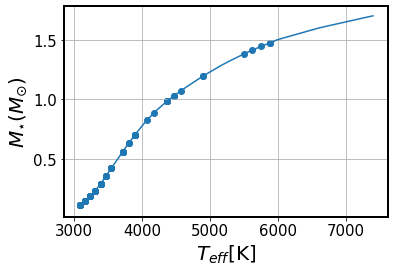

In [4]:
fig, ax = plt.subplots()

#set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

#avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

#create line limits
x = np.linspace(np.min(temperature_feiden), np.max(temperature_feiden))

plt.plot(x,f(x))
plt.scatter(temperature_list_barenfeld, masses_106)
plt.xlabel(r'$T_{eff}\rm[K]$', fontsize=20), plt.ylabel(r'$M_{\star}(M_{\odot})$', fontsize=20)
plt.grid()
ax.tick_params(which='both', labelsize=15)
plt.savefig('Mass 106 Feiden')
plt.show()

